In [ ]:
import pandas as pd
import os
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/Hindi_English_Truncated_Corpus.csv')
df3=pd.read_csv("/content/hindi4K.csv")

In [ ]:
hind=df3['hindi_sentence']
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'

In [ ]:
hind

0       राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...
1       मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2        यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3          हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4             इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।
                              ...                        
3995    उनकी कल्पना में पहले से ही तपोवन या अरण्य आश्र...
3996              उनकी अधिकारिता में पूरा प्रांत आता था .
3997    इस परियोजना के लिए चिन्हित किया जा रहा है - अभ...
3998    यह सही है। वैज्ञानिकों के अनुसार, एक पनीर सैंडविच
3999    24 अगर आप प्राप्त की गई सेवाओं के मापदंड़ों से...
Name: hindi_sentence, Length: 4000, dtype: object

In [ ]:
hind_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters = filters, oov_token=oov_token)
hind_tokenizer.fit_on_texts(hind)

In [ ]:
hind

0       राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...
1       मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2        यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3          हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4             इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।
                              ...                        
3995    उनकी कल्पना में पहले से ही तपोवन या अरण्य आश्र...
3996              उनकी अधिकारिता में पूरा प्रांत आता था .
3997    इस परियोजना के लिए चिन्हित किया जा रहा है - अभ...
3998    यह सही है। वैज्ञानिकों के अनुसार, एक पनीर सैंडविच
3999    24 अगर आप प्राप्त की गई सेवाओं के मापदंड़ों से...
Name: hindi_sentence, Length: 4000, dtype: object

In [ ]:
hind = hind.apply(lambda x: x.replace(u'\xa0',u' '))
hind = hind.apply(lambda x: x.replace('\u200a',' '))

In [ ]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(hind)

In [ ]:
total_words = len(tokenizer.word_index) + 1

In [ ]:
hind

0       राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...
1       मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2        यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3          हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4             इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।
                              ...                        
3995    उनकी कल्पना में पहले से ही तपोवन या अरण्य आश्र...
3996              उनकी अधिकारिता में पूरा प्रांत आता था .
3997    इस परियोजना के लिए चिन्हित किया जा रहा है - अभ...
3998    यह सही है। वैज्ञानिकों के अनुसार, एक पनीर सैंडविच
3999    24 अगर आप प्राप्त की गई सेवाओं के मापदंड़ों से...
Name: hindi_sentence, Length: 4000, dtype: object

In [ ]:
print("Total number of words: ", total_words)

Total number of words:  10788


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 18.7 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_bert_embeddings(text):
    encoded_text = tokenizer.encode_plus(
        text,
        max_length=512,
        add_special_tokens=True,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )
    with torch.no_grad():
        outputs = model(**encoded_text)
        embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.numpy()


In [ ]:
embeddings = hind.apply(get_bert_embeddings)

In [ ]:
embeddings

In [ ]:
input_sequences = []
for line in hind:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

print(input_sequences)

[4013, 2, 99, 21, 169, 100, 119, 36, 27, 11, 1427, 18, 4]
[756, 108, 139, 20, 12, 229, 2, 83, 3, 2486, 4014]
[14, 270, 37, 3, 1164, 270, 7, 71, 26]
[39, 33, 18, 495, 324, 11, 116, 365, 18, 187, 2487]
[1850, 1002, 8, 366, 140, 4015, 1428, 26]
[858, 2, 1165, 1851, 16, 17, 2488, 8, 859, 30, 23, 48, 1166, 5, 325, 7, 86, 757]
[167, 2489, 163, 2490, 76, 97, 2, 1429, 56]
[6, 39, 145, 758, 10, 14, 860, 15, 89, 11, 32, 343, 10]
[4016, 4017, 7, 4018, 594, 20, 2, 1430, 3, 150, 4019, 6, 77, 1167, 595, 292, 2, 665, 6, 77, 1431]
[25, 64, 4, 11, 31, 324, 326, 11, 31, 8, 4020, 4021, 50, 861, 2, 4022, 230, 400, 35, 50, 862]
[2491, 14, 2492, 24, 2493, 11, 31, 259, 2494, 8, 199, 24, 2495, 10]
[183, 4023]
[14, 208, 2496, 1003, 666, 7, 2497, 208, 26]
[22, 327, 1004, 4]
[61, 70, 9, 4024, 2498, 667, 1168, 4025, 2, 200, 13, 1432, 2499, 34]
[78, 496, 89, 596, 120, 1852, 183, 2, 97, 43, 20, 57, 260, 497, 9, 4026, 27, 9, 17, 1005, 2]
[594, 3, 427, 2, 4027, 4028, 2500, 759, 1006, 38, 293, 4029, 457, 498, 309]
[10

In [ ]:
print("Total input sequences: ", len(input_sequences))

Total input sequences:  47047


In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4013,    2,   99], dtype=int32)

In [ ]:
print(max_sequence_len)

27


In [ ]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
len(labels)

47047

In [ ]:
ys = labels

In [ ]:
input_sequences[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 4013,    2,
         99,   21,  169,  100,  119], dtype=int32)

In [ ]:
print(xs[5])
print(labels[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 4013    2   99   21  169  100]
119


In [ ]:
print(ys[5])

119


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(100, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

In [ ]:
adam = Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(xs, ys, epochs=80, verbose=1)

Epoch 1/80
1471/1471 [==============================] - 61s 33ms/step - loss: 7.7278 - accuracy: 0.0406
Epoch 2/80
1471/1471 [==============================] - 23s 16ms/step - loss: 7.3863 - accuracy: 0.0418
Epoch 3/80
1471/1471 [==============================] - 24s 16ms/step - loss: 7.3695 - accuracy: 0.0417
Epoch 4/80
1471/1471 [==============================] - 23s 16ms/step - loss: 7.3393 - accuracy: 0.0417
Epoch 5/80
1471/1471 [==============================] - 23s 16ms/step - loss: 7.3274 - accuracy: 0.0417
Epoch 6/80
1471/1471 [==============================] - 23s 15ms/step - loss: 7.3214 - accuracy: 0.0417
Epoch 7/80
1471/1471 [==============================] - 22s 15ms/step - loss: 7.3188 - accuracy: 0.0417
Epoch 8/80
1471/1471 [==============================] - 23s 16ms/step - loss: 7.3172 - accuracy: 0.0417
Epoch 9/80
1471/1471 [==============================] - 22s 15ms/step - loss: 7.3162 - accuracy: 0.0417
Epoch 10/80
1471/1471 [==============================] - 22s 15m

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 100)           1078800   
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 10788)             3247188   
                                                                 
Total params: 4,627,188
Trainable params: 4,627,188
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = load_model("/content/next_word_prediction_in_hindi_model.h5")
print(model)

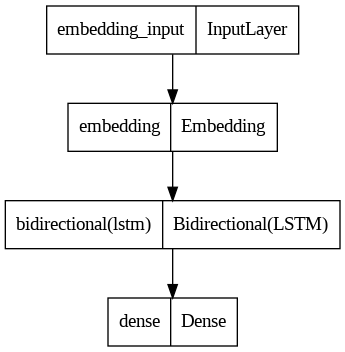

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
seed_text = "मगर उनके "
# निधन के पश्चात उनके भाई सरदार वल्लभ भाई पटेल ने इस वसीयत को स्वीकार नहीं किया और उसपर अदालत में मुकदमा चलाया।
next_words = 3

In [ ]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x=model.predict(token_list)
    classes_x=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == classes_x:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 21ms/step
मगर उनके  यह यह यह


In [ ]:
seed_text = "मगर उनके"
next_words = 3
k = 5  # number of top choices to consider

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list)
    top_k_indices = np.argsort(predict_x[0])[-k:]  # get the indices of top k most probable words
    top_k_words = [tokenizer.index_word[idx] for idx in top_k_indices]  # get the corresponding words

    print("Choose the next word from the following options:")
    for i, word in enumerate(top_k_words):
        print(f"{i+1}: {word}")

    choice = int(input("Enter your choice: "))
    output_word = top_k_words[choice-1]

    seed_text += " " + output_word

print(seed_text)

In [ ]:
model.save('next_word_prediction_in_hindi_model.h5')